# Trips Dataset 1

# 1. Import Libraries - Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
trips = pd.read_csv('trip.csv', error_bad_lines=False, parse_dates=['starttime', 'stoptime'], infer_datetime_format=True)

b'Skipping line 50794: expected 12 fields, saw 20\n'


# 2. Basic EDA

In [3]:
trips.shape

(286857, 12)

In [4]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [5]:
trips.tail()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
286852,255241,2016-08-31 23:34:00,2016-08-31 23:45:00,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286853,255242,2016-08-31 23:48:00,2016-09-01 00:20:00,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286854,255243,2016-08-31 23:47:00,2016-09-01 00:20:00,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,255244,2016-08-31 23:49:00,2016-09-01 00:20:00,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,255245,2016-08-31 23:49:00,2016-09-01 00:20:00,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [6]:
trips.drop(['bikeid'], axis = 1, inplace = True)
trips.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 11 columns):
trip_id              286857 non-null int64
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 24.1+ MB


# Outlier?

In [8]:
trips.describe()  # median share 10 min.

,trip_id,tripduration,birthyear
count,286857.000000,286857.000000,181553.000000
mean,112431.968012,1178.295675,1979.759062
std,76565.154943,2038.458947,10.167119
min,431.000000,60.008000,1931.000000
25%,43051.000000,387.924000,1974.000000
50%,103487.000000,624.842000,1983.000000
75%,179545.000000,1118.466000,1987.000000
max,255245.000000,28794.398000,1999.000000


In [9]:
trips.loc[trips['tripduration'] == trips.tripduration.max()]  #
#trips.tripduration.max()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
163148,124491,2015-08-07 17:53:00,2015-08-08 01:53:00,28794.398,Eastlake Ave E & E Allison St,2nd Ave & Pine St,EL-05,CBD-13,Short-Term Pass Holder,NaN,NaN


In [10]:
trips.loc[trips['tripduration'] == trips.tripduration.min()]

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
139078,98825,2015-06-29 05:25:00,2015-06-29 05:26:00,60.008,15th Ave NE & NE 40th St,15th Ave NE & NE 40th St,UW-04,UW-04,Member,Male,1982.0


# 3. Drop Duplicates

In [11]:
duplicate_rows_df = trips[trips.duplicated()]    # many duplicates
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (50792, 11)


In [12]:
trips.iloc[50792] 

trip_id                                                            431
starttime                                          2014-10-13 10:31:00
stoptime                                           2014-10-13 10:48:00
tripduration                                                   985.935
from_station_name                                  2nd Ave & Spring St
to_station_name      Occidental Park / Occidental Ave S & S Washing...
from_station_id                                                 CBD-06
to_station_id                                                    PS-04
usertype                                                        Member
gender                                                            Male
birthyear                                                         1960
Name: 50792, dtype: object

In [13]:
# dropping duplicate values 
trips.drop_duplicates(subset='trip_id', keep='first', inplace=True) 
trips.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [14]:
duplicate_rows_df = trips[trips.duplicated()]    # many duplicates
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [15]:
# sorting by starttime
trips.sort_values("starttime", ascending=True, inplace=True)
trips.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [16]:
trips.shape

(236065, 11)

In [17]:
trips.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


# 4. Missing values

In [18]:
total = trips.isnull().sum().sort_values(ascending=False)  
total

birthyear            89898
gender               89894
usertype                 0
to_station_id            0
from_station_id          0
to_station_name          0
from_station_name        0
tripduration             0
stoptime                 0
starttime                0
trip_id                  0
dtype: int64

In [19]:
# usertype count 

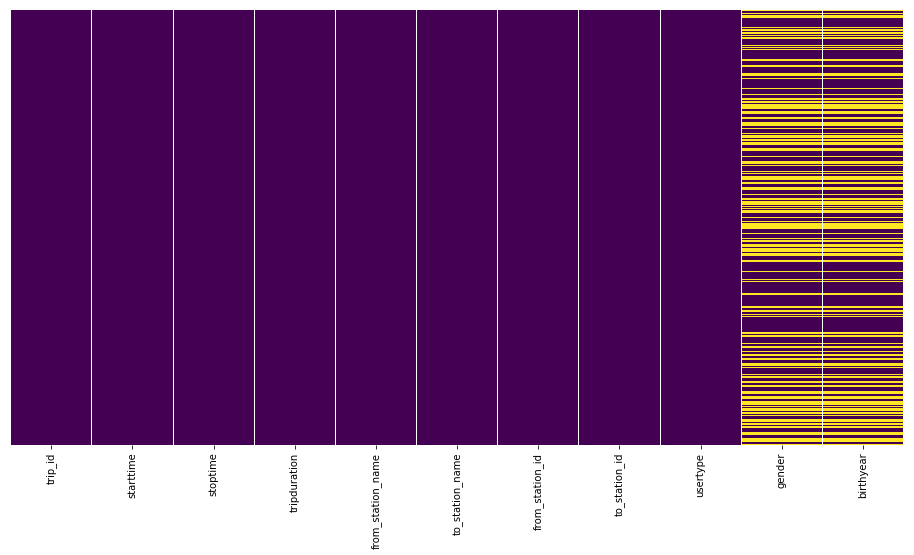

In [21]:
# only gender and birthyear of members is known
plt.figure(figsize=(16, 8))
sb.heatmap(trips.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [22]:
# Find the start date
ind = pd.DatetimeIndex(trips.starttime)
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour
trips['day'] = ind.weekday   # 0=monday

In [23]:
trips.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0


In [24]:
# weekend or not, seasons summer winter etc.

In [25]:
# plot-Count trips by day

# Merge Lat Long

In [26]:
station = pd.read_csv('station.csv', error_bad_lines=False)
trips1 = pd.merge(trips, station, left_on="from_station_id", right_on="station_id")
pd.set_option('display.max_columns', 50) 
trips1.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN


In [27]:
trips1.rename(columns={"lat": "from_lat", "long": "from_long", "current_dockcount":"from_dockcount"}, inplace = True)
trips1.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day,station_id,name,from_lat,from_long,install_date,install_dockcount,modification_date,from_dockcount,decommission_date
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20,11/9/2015,18,NaN


In [28]:
trips1.drop(['station_id','name','install_date','install_dockcount','modification_date','decommission_date'], axis = 1, inplace = True)

In [29]:
trips1.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day,from_lat,from_long,from_dockcount
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0,47.60595,-122.335768,18
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0,47.60595,-122.335768,18
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0,47.60595,-122.335768,18
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0,47.60595,-122.335768,18
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0,47.60595,-122.335768,18


In [30]:
trips1.shape

(236060, 17)

In [31]:
trips2 = pd.merge(trips1, station, left_on="to_station_id", right_on="station_id")
pd.set_option('display.max_columns', 50) 
trips2.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day,from_lat,from_long,from_dockcount,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN


In [32]:
trips2.rename(columns={"lat": "to_lat", "long": "to_long", "current_dockcount":"to_dockcount"}, inplace = True)
trips2.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day,from_lat,from_long,from_dockcount,station_id,name,to_lat,to_long,install_date,install_dockcount,modification_date,to_dockcount,decommission_date
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0,47.60595,-122.335768,18,PS-04,Occidental Park / Occidental Ave S & S Washing...,47.600757,-122.332946,10/13/2014,18,NaN,18,NaN


In [33]:
trips2.drop(['station_id','name','install_date','install_dockcount','modification_date','decommission_date'], axis = 1, inplace = True)

In [34]:
trips2.head()

,trip_id,starttime,stoptime,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour,day,from_lat,from_long,from_dockcount,to_lat,to_long,to_dockcount
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10,0,47.60595,-122.335768,18,47.600757,-122.332946,18
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10,0,47.60595,-122.335768,18,47.600757,-122.332946,18
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10,0,47.60595,-122.335768,18,47.600757,-122.332946,18
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10,0,47.60595,-122.335768,18,47.600757,-122.332946,18
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10,0,47.60595,-122.335768,18,47.600757,-122.332946,18


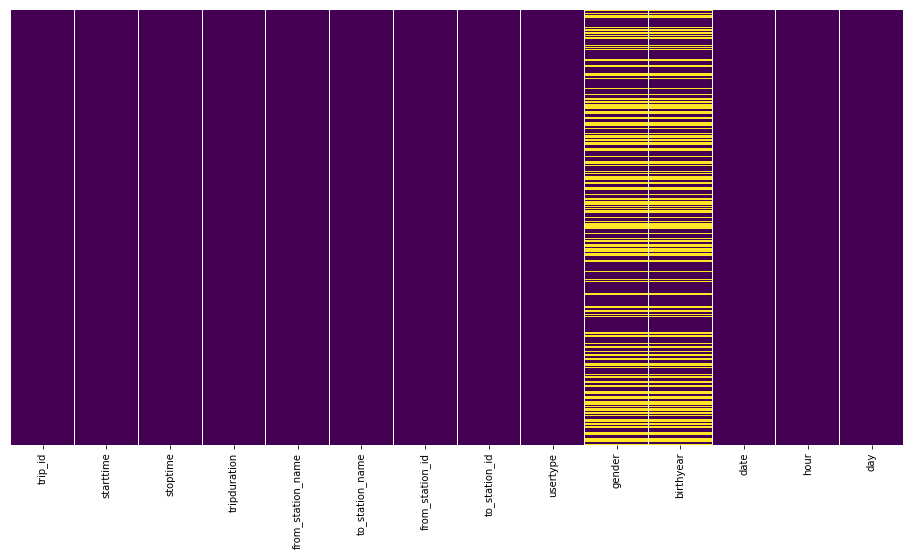

In [35]:
plt.figure(figsize=(16, 8))
sb.heatmap(trips.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [81]:
trips2.to_csv('/Users/jorrikfulda/nf-ds/capstone/trips_data_clean.csv', index=False)